# <font color=Maroon>SUMMARY STATISTICS & CORRELATION</font>
## <font color=Blue>Property Features Vs Housing Price</font>

### <font color=Black>Features Used to predict the price: </font> <font color=Green> # of Bedrooms | # of Bathrooms | Sq Footage | Age of the House

### LOADING LIBRARIES

In [28]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats

import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams

import statsmodels.formula.api as smf

In [29]:
print('Python version: %s.%s.%s' % sys.version_info[:3])
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)

Python version: 3.7.3
numpy version: 1.16.2
pandas version: 0.24.2
scikit-learn version: 0.20.3


### LOADING DATA

In [30]:
#loading data
data_file = "./Resources/Zillow_data_20191023_(Raleigh Durham Cary).csv"
data = pd.read_csv(data_file)
data.head()


,@id,@name,@type,FIPScounty,bathrooms,bedrooms,city,finishedSqFt,lastSoldDate,lastSoldPrice,...,street,taxAssessment,taxAssessmentYear,totalRooms,useCode,yearBuilt,zestimate,zindexValue,zipcode,zpid
0,270325,Southeast Raleigh,neighborhood,37183.0,3.0,3.0,Raleigh,1618.0,4/2/2019,19000.0,...,3915 Alder Grove Ln,28000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"149,300",27610,79886745
1,54047,Raleigh,city,37183.0,3.0,4.0,Raleigh,2537.0,NaN,NaN,...,3207 Britmass Dr,40000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"221,100",27616,215491685
2,343869,Northeast Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,1773.0,12/1/1989,102500.0,...,2004 Carthage Cir,159269.0,2018.0,7.0,SingleFamily,1989.0,224901.0,"171,900",27604,6504197
3,54047,Raleigh,city,37183.0,4.0,3.0,Raleigh,4617.0,5/16/2003,575000.0,...,9924 Waterview Rd,618168.0,2018.0,12.0,SingleFamily,1994.0,869696.0,"221,100",27615,6483992
4,270318,North Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,3066.0,5/27/2004,364000.0,...,2047 Hornbeck Ct,435002.0,2018.0,14.0,SingleFamily,2003.0,469902.0,"270,100",27614,65332699


In [31]:
data.rename(columns={'@id':'id','@name':'region','@type':'locality'}, 
                 inplace=True)
data.head()

,id,region,locality,FIPScounty,bathrooms,bedrooms,city,finishedSqFt,lastSoldDate,lastSoldPrice,...,street,taxAssessment,taxAssessmentYear,totalRooms,useCode,yearBuilt,zestimate,zindexValue,zipcode,zpid
0,270325,Southeast Raleigh,neighborhood,37183.0,3.0,3.0,Raleigh,1618.0,4/2/2019,19000.0,...,3915 Alder Grove Ln,28000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"149,300",27610,79886745
1,54047,Raleigh,city,37183.0,3.0,4.0,Raleigh,2537.0,NaN,NaN,...,3207 Britmass Dr,40000.0,2018.0,NaN,SingleFamily,2019.0,NaN,"221,100",27616,215491685
2,343869,Northeast Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,1773.0,12/1/1989,102500.0,...,2004 Carthage Cir,159269.0,2018.0,7.0,SingleFamily,1989.0,224901.0,"171,900",27604,6504197
3,54047,Raleigh,city,37183.0,4.0,3.0,Raleigh,4617.0,5/16/2003,575000.0,...,9924 Waterview Rd,618168.0,2018.0,12.0,SingleFamily,1994.0,869696.0,"221,100",27615,6483992
4,270318,North Raleigh,neighborhood,37183.0,3.0,4.0,Raleigh,3066.0,5/27/2004,364000.0,...,2047 Hornbeck Ct,435002.0,2018.0,14.0,SingleFamily,2003.0,469902.0,"270,100",27614,65332699


#### Drop unwanted columns to retain only the relevant features

In [32]:
rdc_data =data.drop(columns=['links','FIPScounty','totalRooms','useCode','id','zindexValue','zpid','street','state','zipcode','region','locality','city','lastSoldDate'])
rdc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 11 columns):
bathrooms            1673 non-null float64
bedrooms             1672 non-null float64
finishedSqFt         1679 non-null float64
lastSoldPrice        1286 non-null float64
latitude             1683 non-null float64
longitude            1683 non-null float64
lotSizeSqFt          1555 non-null float64
taxAssessment        1449 non-null float64
taxAssessmentYear    1454 non-null float64
yearBuilt            1601 non-null float64
zestimate            1594 non-null float64
dtypes: float64(11)
memory usage: 144.7 KB


In [33]:
#drop records with blank zestimate valyue
rdc_data['zestimate'].replace('', np.nan, inplace=True)
rdc_data.info()
rdc_data.dropna(subset=['zestimate'], inplace=True)
rdc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 11 columns):
bathrooms            1673 non-null float64
bedrooms             1672 non-null float64
finishedSqFt         1679 non-null float64
lastSoldPrice        1286 non-null float64
latitude             1683 non-null float64
longitude            1683 non-null float64
lotSizeSqFt          1555 non-null float64
taxAssessment        1449 non-null float64
taxAssessmentYear    1454 non-null float64
yearBuilt            1601 non-null float64
zestimate            1594 non-null float64
dtypes: float64(11)
memory usage: 144.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 2 to 1682
Data columns (total 11 columns):
bathrooms            1589 non-null float64
bedrooms             1589 non-null float64
finishedSqFt         1593 non-null float64
lastSoldPrice        1242 non-null float64
latitude             1594 non-null float64
longitude            1594 non-null float64
lotSizeSqFt 

### Estimate Price Statistics of the Raleugh Durham Cary Housing dataset

In [34]:
print('The Raleigh-Durham-Cary housing dataset has {0} data points with {1} variables each'.format(*rdc_data.shape))

prices = rdc_data["zestimate"]

#Minimum Price of the data
minimum_price = np.min(prices)

#Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Raleigh-Durham-Cary housing dataset:\n")
x = minimum_price
print('Minimum Price = %0.2f' %minimum_price)
print('Maximum Price = %0.2f' %maximum_price)
print('Mean Price = %0.2f' %mean_price)
print('Median Price = %0.2f' %median_price)
print('Std Deviation of prices = %0.2f' %std_price)
print('First quartile of prices = %0.2f' %first_quartile)
print('Third quartile of Price = %0.2f' %third_quartile)
print('Interquartile(IQR) of Price = %0.2f' %inter_quartile)




The Raleigh-Durham-Cary housing dataset has 1594 data points with 11 variables each
Statistics for Raleigh-Durham-Cary housing dataset:

Minimum Price = 75526.00
Maximum Price = 3695643.00
Mean Price = 469912.34
Median Price = 390623.50
Std Deviation of prices = 305809.43
First quartile of prices = 290714.00
Third quartile of Price = 553791.00
Interquartile(IQR) of Price = 263077.00


### Correlation of each feature with the Price (zestimate)

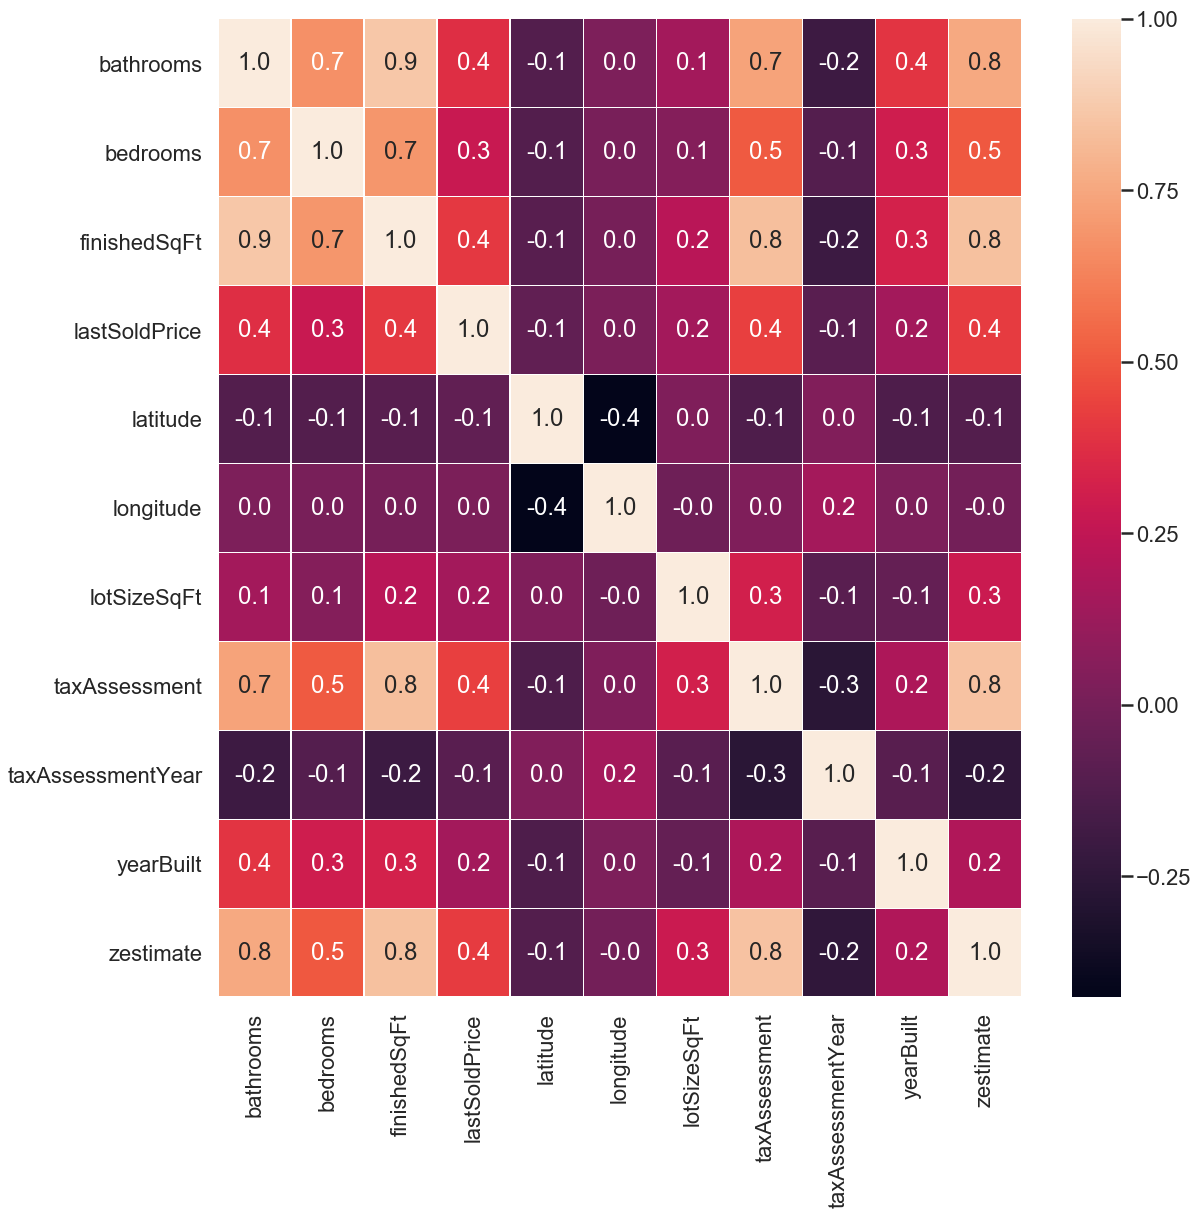

In [35]:
#correlation plot
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(rdc_data.corr(), annot=True, linewidths=.25, fmt= '.1f',ax=ax)
plt.show()

### Missing Feature Values

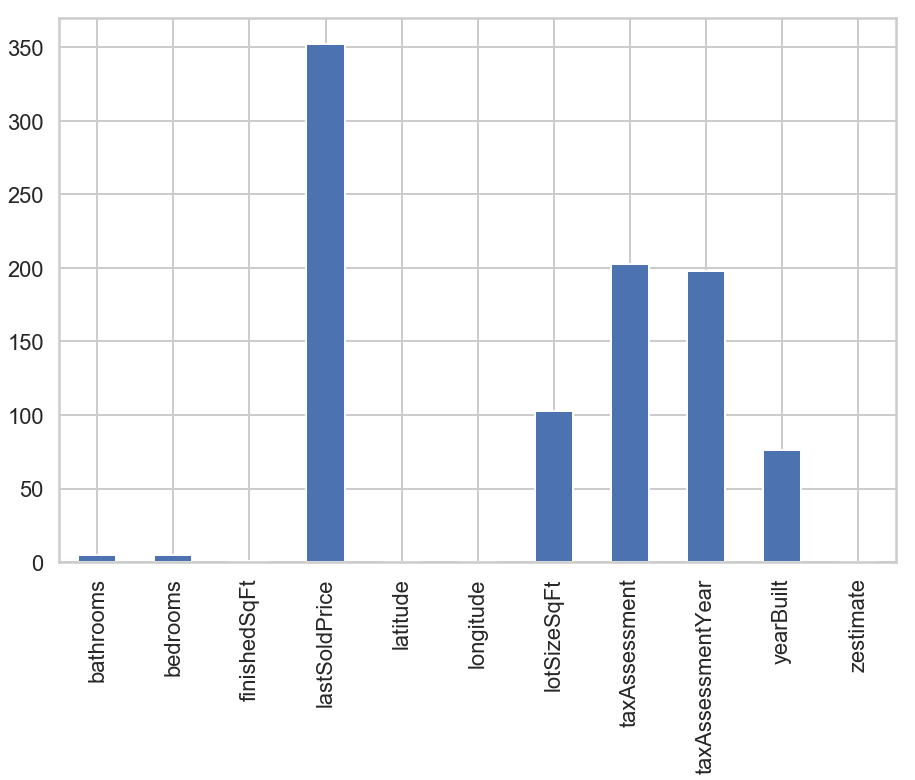

In [36]:
# Plot columns with missing values to evaluate how many are missing
rdc_data.isnull().sum().plot(kind='bar', figsize=(15, 10))
plt.show()

### Linear Regression Plot | #Bathrooms Vs Price

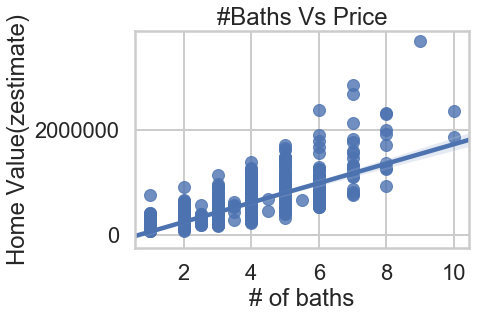

In [37]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="bathrooms", data=rdc_data, fit_reg = True)
plt.title("#Baths Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("# of baths")
plt.savefig('Images/#bathroomsVsPrice.png')

### Linear Regression Plot | #Bedrooms Vs Price

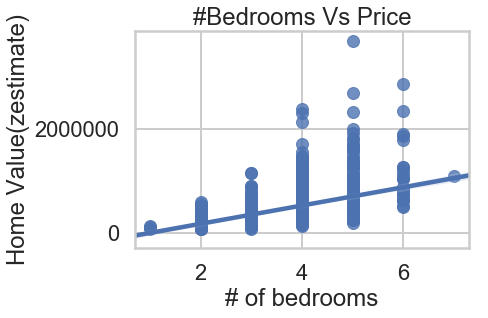

In [38]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="bedrooms", data=rdc_data, fit_reg = True)

plt.title("#Bedrooms Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("# of bedrooms")
plt.savefig('Images/#bedroomsVsPrice.png')


### Linear Regression Plot | SqFt Vs Price

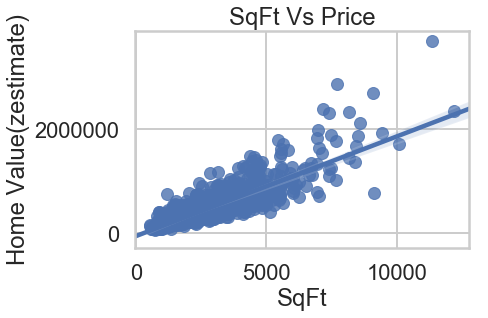

In [39]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="finishedSqFt", data=rdc_data, fit_reg = True)


plt.title("SqFt Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("SqFt")
plt.savefig('Images/SqFtVsPrice.png')


### Linear Regression Plot | Latitude Vs Price

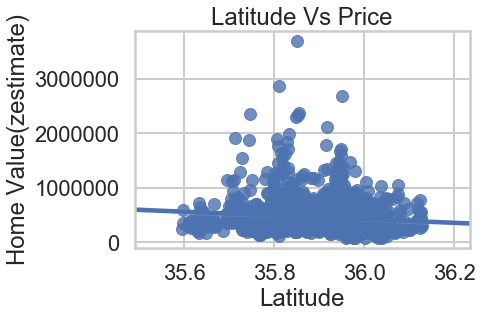

In [40]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="latitude", data=rdc_data, fit_reg = True)


plt.title("Latitude Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("Latitude")
plt.savefig('Images/LatitudeVsPrice.png')

### Linear Regression Plot | Longitude Vs Price

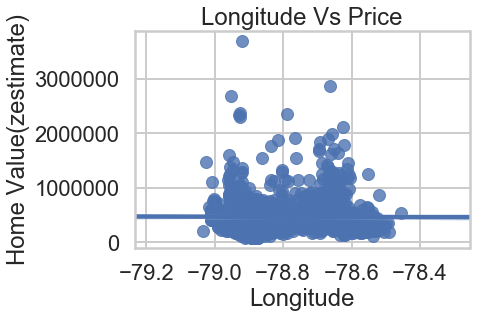

In [41]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="longitude", data=rdc_data, fit_reg = True)


plt.title("Longitude Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("Longitude")
plt.savefig('Images/LongitudeVsPrice.png')

### Linear Regression Plot | LotSize Vs Price

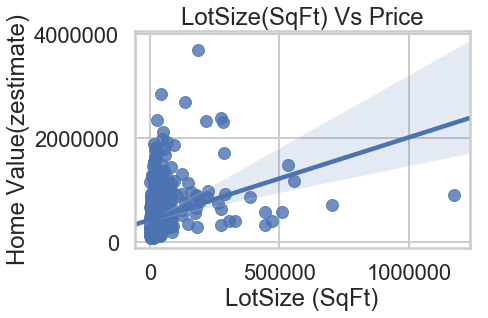

In [42]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="lotSizeSqFt", data=rdc_data, fit_reg = True)


plt.title("LotSize(SqFt) Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("LotSize (SqFt)")
plt.savefig('Images/LotsizeVsPrice.png')

### Linear Regression Plot | taxAssessment Vs Price

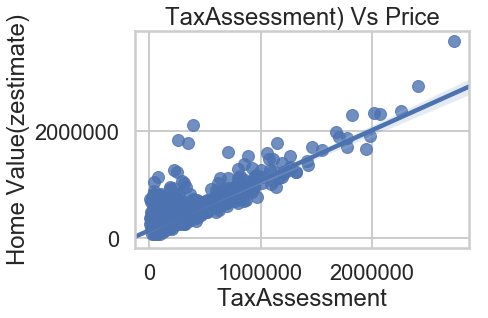

In [43]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="taxAssessment", data=rdc_data, fit_reg = True)

plt.title("TaxAssessment) Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("TaxAssessment")
plt.savefig('Images/TaxAssessmentVsPrice.png')

### Linear Regression Plot | Year Built Vs Price

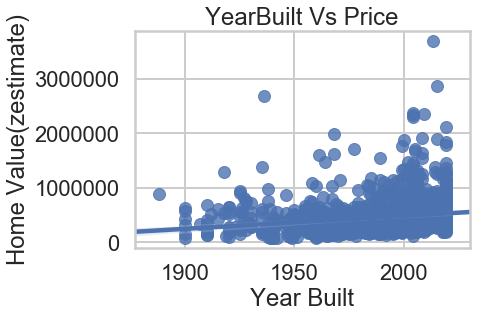

In [44]:
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="yearBuilt", data=rdc_data, fit_reg = True)

plt.title("YearBuilt Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("Year Built")
plt.savefig('Images/YearBuiltVsPrice.png')

### Linear Regression Plot | Year Built Vs Price

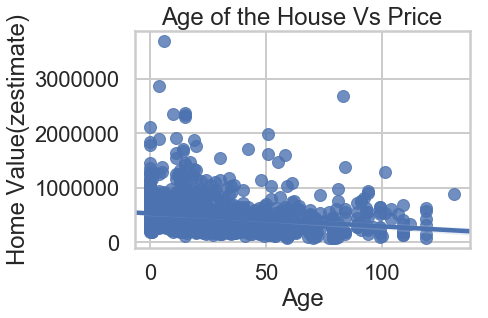

In [45]:
rdc_data['age']=2019-rdc_data['yearBuilt']
# Using seaborn regplot provides a quick automatic linear regression fit
sns.regplot(y="zestimate", x="age", data=rdc_data, fit_reg = True)

plt.title("Age of the House Vs Price")
plt.ylabel("Home Value(zestimate)")
plt.xlabel("Age")
plt.savefig('Images/AgeVsPrice.png')

### Pair Plots

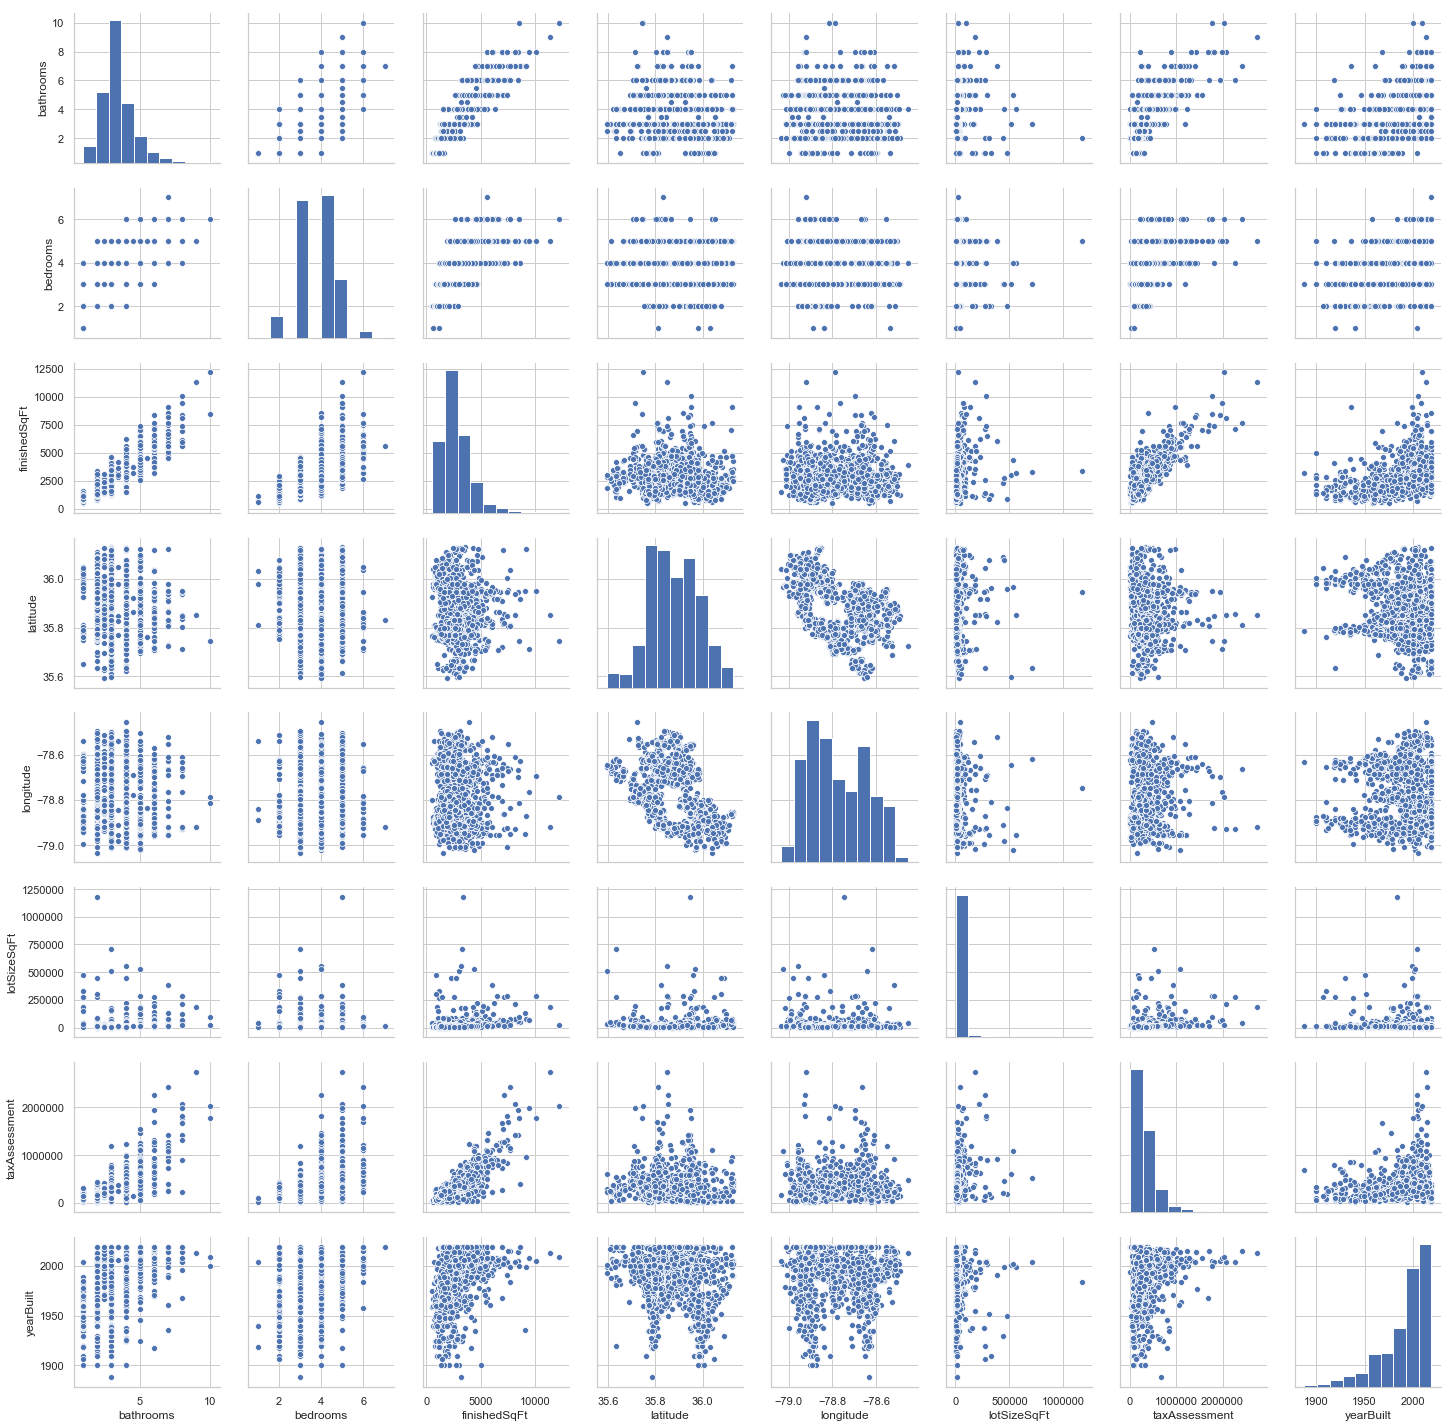

In [46]:
#PairPlots of every Feature Vs Feature
sns.set(style='whitegrid',context='notebook')
cols=['bathrooms','bedrooms','finishedSqFt','latitude','longitude','lotSizeSqFt','taxAssessment','yearBuilt']
sns.pairplot(rdc_data[cols],height=2.5)
plt.show()

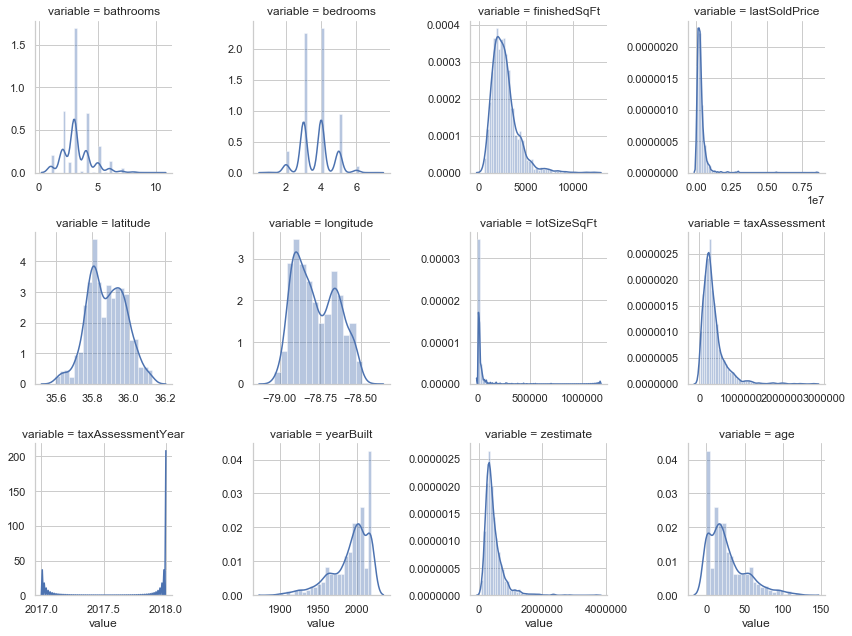

In [47]:
num = [f for f in rdc_data.columns if rdc_data.dtypes[f] != 'object']

nd = pd.melt(rdc_data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1